<a href="https://colab.research.google.com/github/Pterjudin/My-Deep-Learning-Lab/blob/main/mnist_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
from keras.datasets import mnist

In [20]:
(train_images, train_labels) , (test_images, test_labels) = mnist.load_data()

In [22]:
print(train_images.ndim)
print(train_images.shape)
print(train_images.dtype)

3
(60000, 28, 28)
uint8


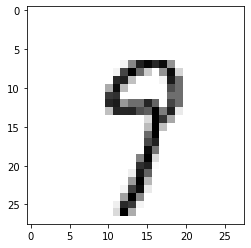

In [28]:
digit = train_images[1500]

import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()


In [29]:
new_slice = train_images[10:100]
print(new_slice.shape)

(90, 28, 28)


In [12]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape = (28 * 28, )))
network.add(layers.Dense(10, activation = 'softmax'))

network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics = ['accuracy'])

In [13]:
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32') / 255


from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 5s 10ms/step - loss: 0.4249 - accuracy: 0.8765
Epoch 2/5
469/469 [==============================] - 5s 10ms/step - loss: 0.1109 - accuracy: 0.9678
Epoch 3/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0705 - accuracy: 0.9787
Epoch 4/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0496 - accuracy: 0.9850
Epoch 5/5
469/469 [==============================] - 4s 10ms/step - loss: 0.0351 - accuracy: 0.9902


In [14]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0684 - accuracy: 0.9782
test_acc: 0.9782000184059143
